In [108]:
import pandas as pd
import seaborn as sns 
import scipy as sp 
import numpy as np
from  matplotlib import pyplot as plt
sns.set(font_scale=1, style="white",  #palette="viridis", 
        rc={'font.size': 12, 'figure.figsize': (9,5), 'axes.grid': True, 'lines.linewidth':2.0, 
            'grid.color': '.8', 'grid.linewidth': 0.5,})

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
ch1 = pd.read_csv("../data/chen_1_rep_50.csv")
ch2 = pd.read_csv("../data/chen_2_rep_50.csv")
ch3 = pd.read_csv("../data/chen_3_rep_50.csv")

In [8]:
df = pd.concat([ch1, ch2, ch3])
df.columns = "scenario", "sample_size", "s_factor", "value_f"

In [25]:
df.loc[df.scenario == "chen3", "scenario"] = "chen4"

In [69]:
df.to_csv("../data/chen_rep_50.csv")

In [180]:
pivot = df.groupby("scenario").apply(lambda o: o.pivot_table(values="value_f", index="sample_size", columns="s_factor", ))
pivot

s_factor                     50         51         52         53         54  \
scenario sample_size                                                          
chen1    50          -12.970412 -12.968097 -12.964880 -12.962432 -12.958332   
         100           7.223963   7.224585   7.225178   7.225673   7.226597   
         200           7.956153   7.956203   7.956233   7.956237   7.956230   
         400           7.984739   7.984732   7.984731   7.984731   7.984730   
         800           7.985755   7.985752   7.985753   7.985748   7.985745   
chen2    50            0.277775   0.285962   0.295312   0.306906   0.317457   
         100           3.775407   3.784421   3.787552   3.794392   3.801880   
         200           5.235059   5.236330   5.237235   5.237664   5.238489   
         400           5.656658   5.657525   5.658063   5.659078   5.659512   
         800           5.966039   5.966373   5.966735   5.967322   5.967326   
chen4    50           -3.836085  -3.829352  -3.818108  -3.808020  -3.796086   
         100          -1.346666  -1.332131  -1.319974  -1.307407  -1.295242   
         200           1.358436   1.372560   1.387559   1.400643   1.412208   
         400           5.246555   5.249871   5.252133   5.255791   5.258967   
         800           5.888761   5.889906   5.891493   5.893037   5.893841   

s_factor                     55         56         57         58         59  \
scenario sample_size                                                          
chen1    50          -12.955293 -12.954163 -12.952066 -12.948624 -12.946417   
         100           7.227509   7.228286   7.229375   7.229618   7.230043   
         200           7.956301   7.956329   7.956360   7.956450   7.956494   
         400           7.984721   7.984719   7.984716   7.984709   7.984710   
         800           7.985745   7.985740   7.985738   7.985738   7.985737   
chen2    50            0.326742   0.337134   0.347243   0.356819   0.367100   
         100           3.806209   3.812515   3.817539   3.823538   3.829667   
         200           5.239662   5.240109   5.240506   5.241316   5.243062   
         400           5.659758   5.660243   5.660825   5.661885   5.662270   
         800           5.967505   5.967873   5.968122   5.968459   5.968385   
chen4    50           -3.786019  -3.775676  -3.766608  -3.755159  -3.742178   
         100          -1.277484  -1.265291  -1.253886  -1.240276  -1.226758   
         200           1.427738   1.438202   1.451434   1.467335   1.479206   
         400           5.262247   5.264426   5.269267   5.271817   5.275959   
         800           5.895224   5.896111   5.897479   5.898699   5.899663   

s_factor                ...             90         91         92         93  \
scenario sample_size    ...                                                   
chen1    50             ...     -12.853529 -12.851195 -12.846917 -12.841207   
         100            ...       7.244231   7.244625   7.244820   7.244889   
         200            ...       7.957182   7.957122   7.957041   7.957021   
         400            ...       7.984447   7.984445   7.984436   7.984433   
         800            ...       7.985617   7.985612   7.985598   7.985587   
chen2    50             ...       0.616975   0.623804   0.638381   0.648920   
         100            ...       3.931074   3.935047   3.936717   3.938099   
         200            ...       5.259027   5.259450   5.258923   5.258320   
         400            ...       5.675543   5.676280   5.676802   5.677295   
         800            ...       5.972712   5.972957   5.973313   5.973141   
chen4    50             ...      -3.348870  -3.330653  -3.308142  -3.288140   
         100            ...      -0.764141  -0.740313  -0.718680  -0.698439   
         200            ...       1.897468   1.914780   1.933250   1.953561   
         400            ...       5.362272   5.365443   5.369124   5.373215   
         800            ...       5.931046   5.9

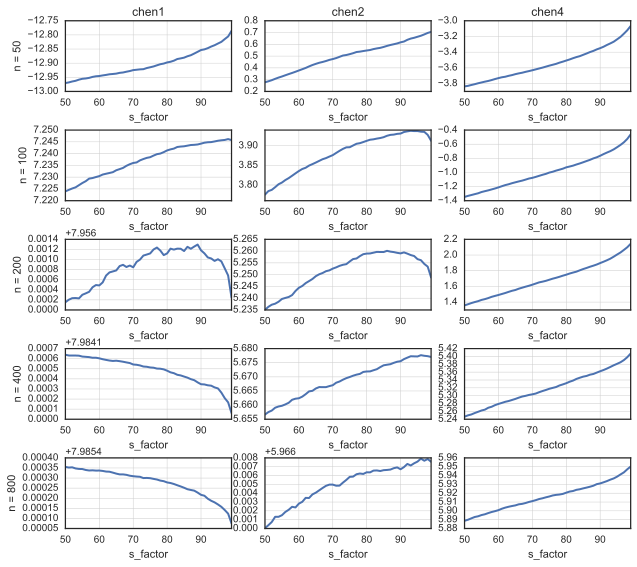

In [182]:
fig, ax = plt.subplots(5, 3,  figsize=(9, 8))
labels = []
i = j = 0
for n_size, grp_size in df.groupby("sample_size"):
    for sc, grp_size_sc in grp_size.groupby("scenario"):
        g = grp_size_sc.groupby("s_factor")
        ms = g.value_f.mean()
        x, m = ms.index, ms.values
        ms.plot(ax=ax[i,j])
        std = g.value_f.std().values
#         ax[i,j].fill_between(x, m + std, m - std, color='g', alpha=0.1 )
        if j == 0: ax[i,j].set_ylabel("n = {}".format(n_size))
        if i == 0: ax[i,j].set_title(sc)
        j += 1 
    i += 1
    j = 0 
plt.tight_layout(pad = 1.01, h_pad=-0.2, w_pad=0.1)

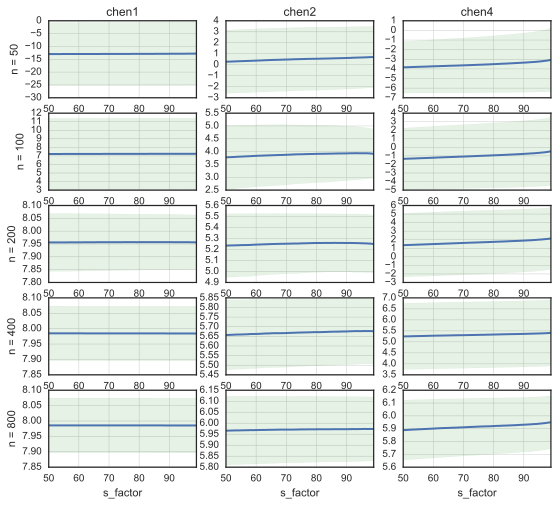

In [175]:
fig, ax = plt.subplots(5, 3, figsize=(9, 8))
labels = []
i = j = 0
for n_size, grp_size in df.groupby("sample_size"):
    for sc, grp_size_sc in grp_size.groupby("scenario"):
        g = grp_size_sc.groupby("s_factor")
        ms = g.value_f.mean()
        x, m = ms.index, ms.values
        ms.plot(ax=ax[i,j])
        std = g.value_f.std().values
        ax[i,j].fill_between(x, m + std, m - std, color='g', alpha=0.1 )
        if j == 0: ax[i,j].set_ylabel("n = {}".format(n_size))
        if i == 0: ax[i,j].set_title(sc)
        j += 1 
    i += 1
    j = 0 
# plt.tight_layout(pad = 1.01, h_pad=-0.2, w_pad=0.1)


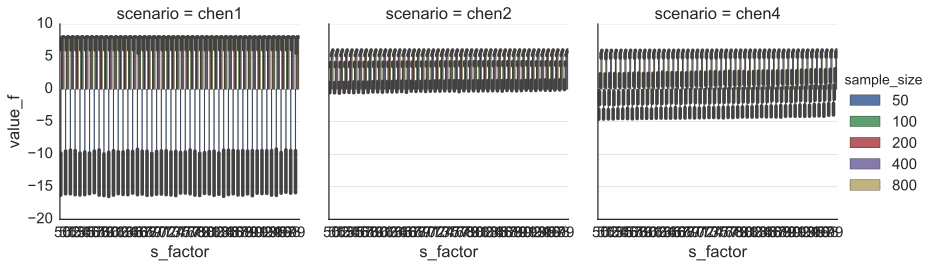

In [66]:
g = sns.factorplot( x="s_factor", y="value_f",  hue="sample_size", col="scenario", data=df,
                   size=4, kind="bar")

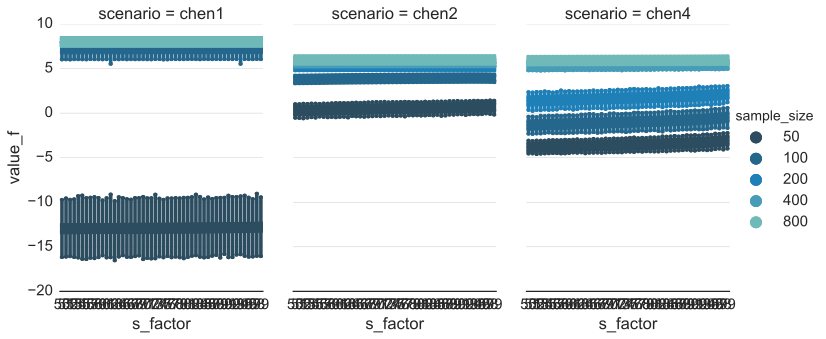

In [67]:
g = sns.factorplot(x="s_factor", y="value_f", hue="sample_size", col="scenario", data=df,
                   capsize=.2, palette="YlGnBu_d", size=5, aspect=.7)
g.despine(left=True)

In [183]:
pivot.loc[:, [50, 60, 70, 80, 90, 95, 99]]

s_factor                     50         60         70         80         90  \
scenario sample_size                                                          
chen1    50          -12.970412 -12.945471 -12.924606 -12.897393 -12.853529   
         100           7.223963   7.230443   7.236025   7.241353   7.244231   
         200           7.956153   7.956486   7.956845   7.957121   7.957182   
         400           7.984739   7.984704   7.984643   7.984581   7.984447   
         800           7.985755   7.985737   7.985709   7.985678   7.985617   
chen2    50            0.277775   0.377907   0.474919   0.547636   0.616975   
         100           3.775407   3.835590   3.876139   3.912526   3.931074   
         200           5.235059   5.244419   5.252566   5.258947   5.259027   
         400           5.656658   5.662422   5.667043   5.671904   5.675543   
         800           5.966039   5.968818   5.970971   5.972368   5.972712   
chen4    50           -3.836085  -3.730569  -3.630454  -3.506564  -3.348870   
         100          -1.346666  -1.211753  -1.076675  -0.927848  -0.764141   
         200           1.358436   1.490909   1.621978   1.749477   1.897468   
         400           5.246555   5.279018   5.303502   5.331795   5.362272   
         800           5.888761   5.900780   5.911023   5.920587   5.931046   

s_factor                     95         99  
scenario sample_size                        
chen1    50          -12.830465 -12.785795  
         100           7.245462   7.245735  
         200           7.957006   7.956242  
         400           7.984405   7.984161  
         800           7.985569   7.985475  
chen2    50            0.664294   0.705418  
         100           3.937473   3.912703  
         200           5.256588   5.248821  
         400           5.677219   5.677054  
         800           5.973579   5.973562  
chen4    50           -3.236304  -3.066209  
         100          -0.642800  -0.461251  
         200           2.006389   2.143244  
         400           5.381237   5.407492  
         800           5.938746   5.950194

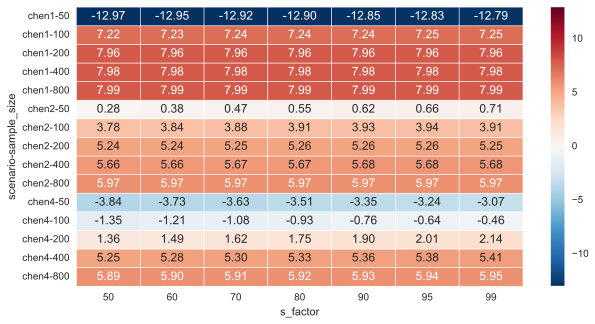

In [185]:
plt.figure(figsize=(10,5))
sns.heatmap(pivot.loc[:, [50, 60, 70, 80, 90, 95, 99]], annot=True, linewidths=.5, fmt='.2f')